# CUSTOMERS SHOPPING ANALYSIS

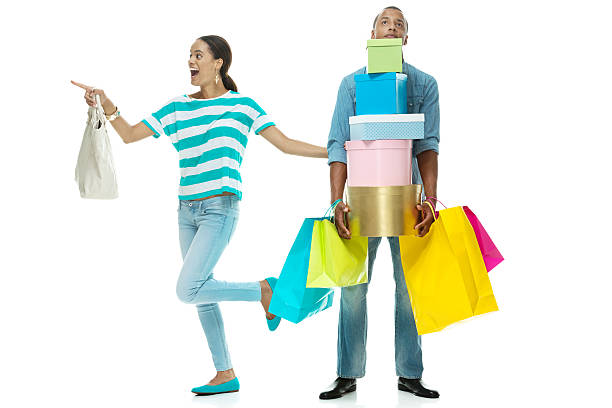

In [54]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (20,7)

In [55]:
# Importing the dataset
dataset = pd.read_csv('Data/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [56]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
sample=dataset.rename(columns={'Annual Income (k$)':'income'})

In [58]:
female=dataset[dataset['Genre']=='Female']
male=dataset[dataset['Genre']=='Male']

In [59]:
male=male.rename(columns={"Spending Score (1-100)": "expense",'Annual Income (k$)':'income'})
female=female.rename(columns={"Spending Score (1-100)": "expense",'Annual Income (k$)':'income'})

In [60]:
sample.income.describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: income, dtype: float64

In [66]:
male_low=male[male['income'] <=59]
male_medium=male[(male['income'] >59) & (male['income'] <=100)]
male_high=male[male['income'] >100]

female_low=female[female['income'] <=59]
female_medium=female[(female['income'] >59) & (female['income'] <=100)]
female_high=female[female['income'] >100]

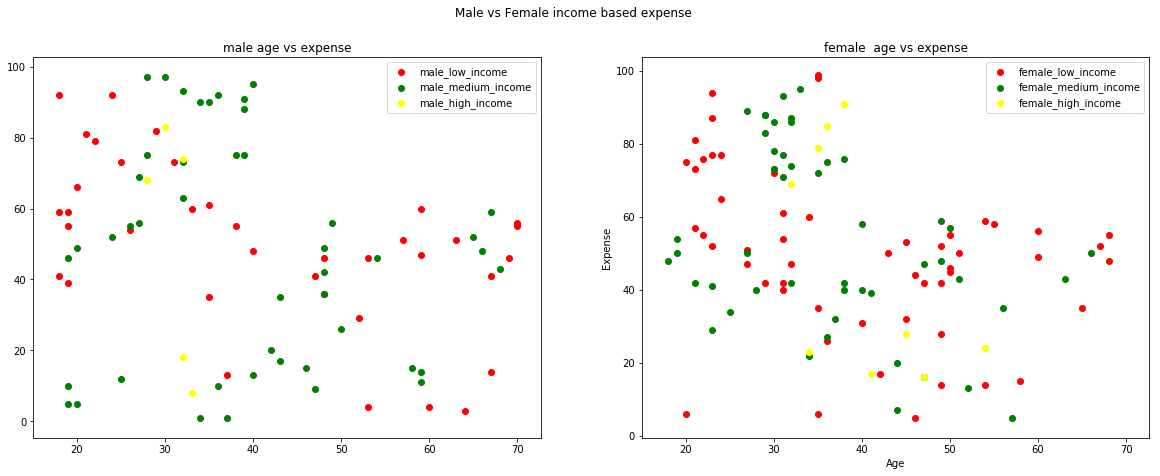

In [69]:


f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
f.suptitle('Male vs Female income based expense')

ax1.set_title("male age vs expense")
ax1.scatter(male_low.Age,male_low.expense,color='red')
ax1.scatter(male_medium.Age,male_medium.expense,color='green')
ax1.scatter(male_high.Age,male_high.expense,color='yellow')
ax1.legend(['male_low_income','male_medium_income','male_high_income'])


ax2.set_title("female  age vs expense")
ax2.scatter(female_low.Age,female_low.expense,color='red')
ax2.scatter(female_medium.Age,female_medium.expense,color='green')
ax2.scatter(female_high.Age,female_high.expense,color='yellow')
ax2.legend(['female_low_income','female_medium_income','female_high_income'])



plt.xlabel("Age")
plt.ylabel("Expense")

plt.show();



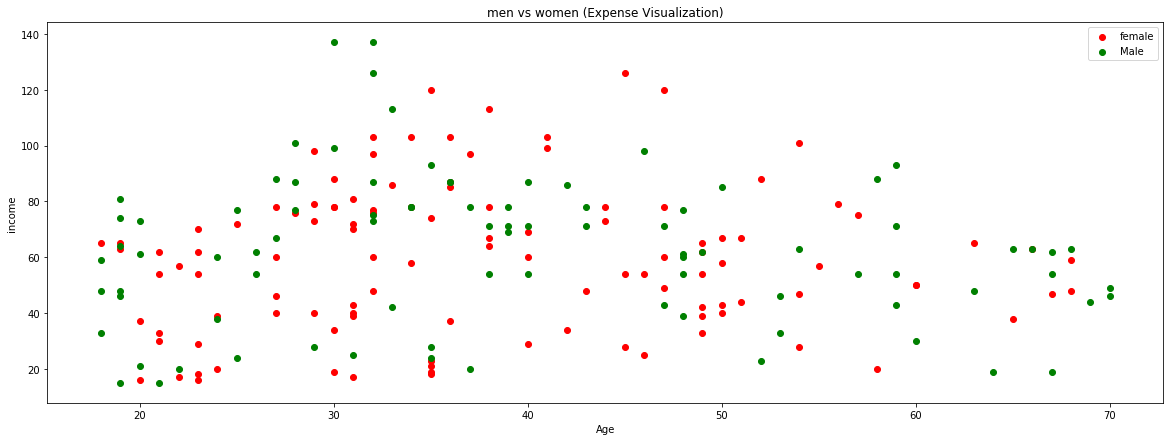

In [38]:
plt.scatter(female.Age,female.income,color='red')
plt.scatter(male.Age,male.income,color='Green')


plt.title("men vs women (Expense Visualization)")
plt.legend(['female','Male'])
plt.xlabel("Age")
plt.ylabel("income")

plt.show()

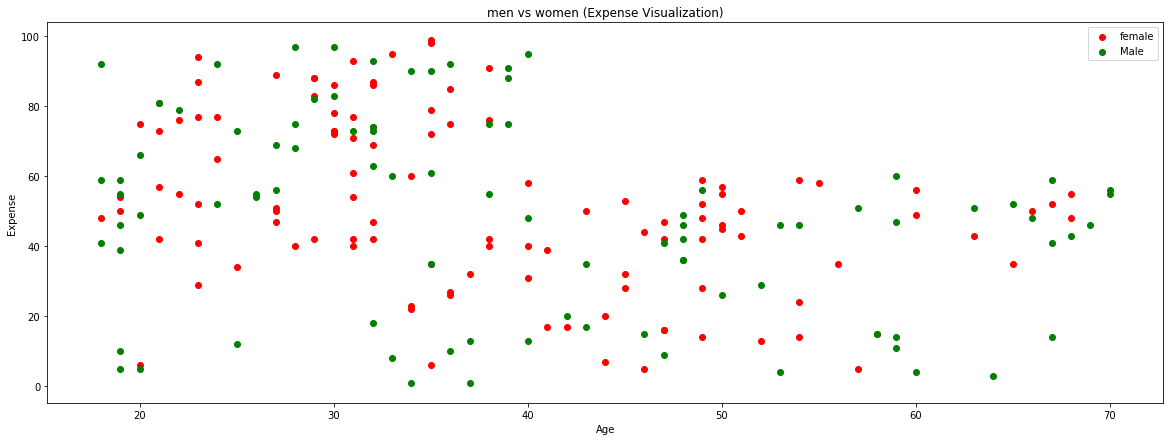

In [31]:
plt.scatter(female.Age,female.expense,color='red')
plt.scatter(male.Age,male.expense,color='Green')


plt.title("men vs women (Expense Visualization)")
plt.legend(['female','Male'])
plt.xlabel("Age")
plt.ylabel("Expense")

plt.show()

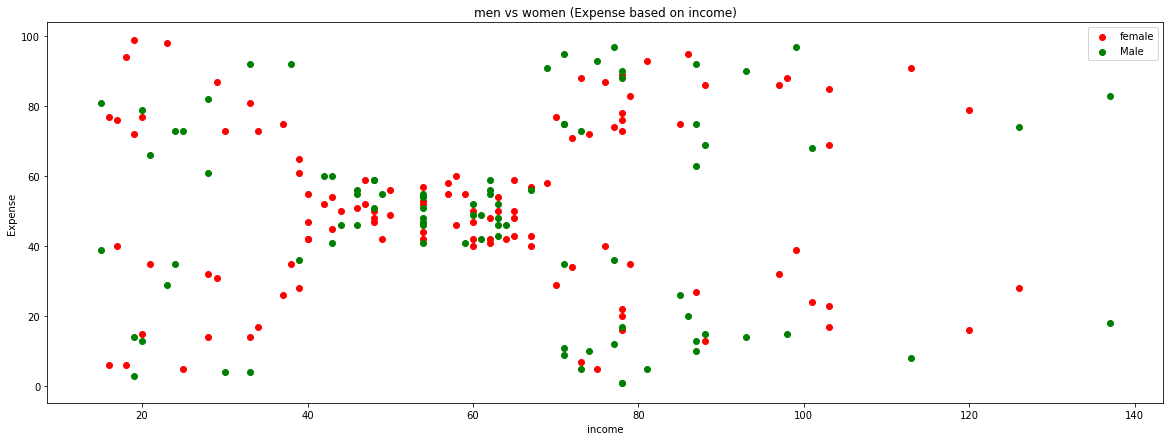

In [32]:
plt.scatter(female.income,female.expense,color='red')
plt.scatter(male.income,male.expense,color='Green')

plt.title("men vs women (Expense based on income)")
plt.legend(['female','Male'])
plt.xlabel("income")
plt.ylabel("Expense")

plt.show()

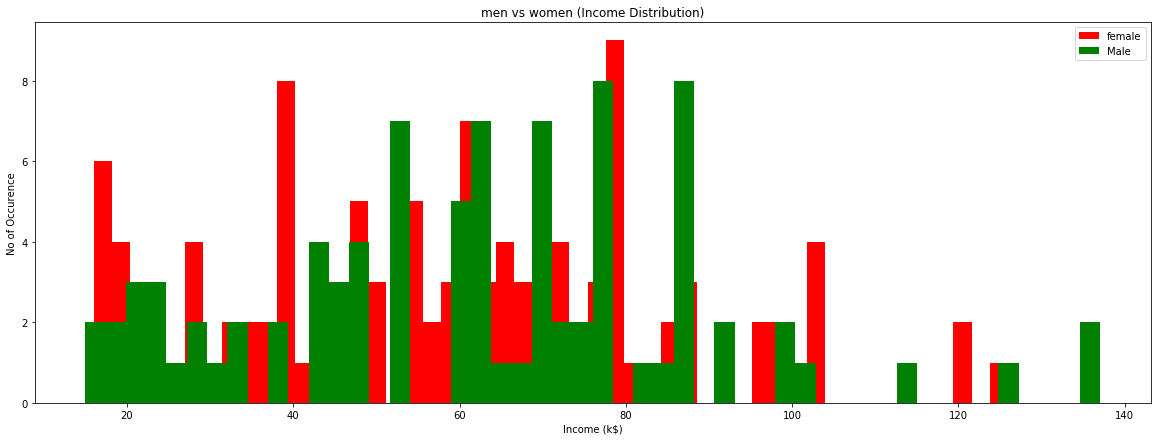

In [33]:
bins=50

plt.hist(female.income,bins=bins,color='red')
plt.hist(male.income,bins=bins,color='green')

plt.title("men vs women (Income Distribution)")
plt.legend(['female','Male'])
plt.xlabel("Income (k$)")
plt.ylabel("No of Occurence")

plt.show()

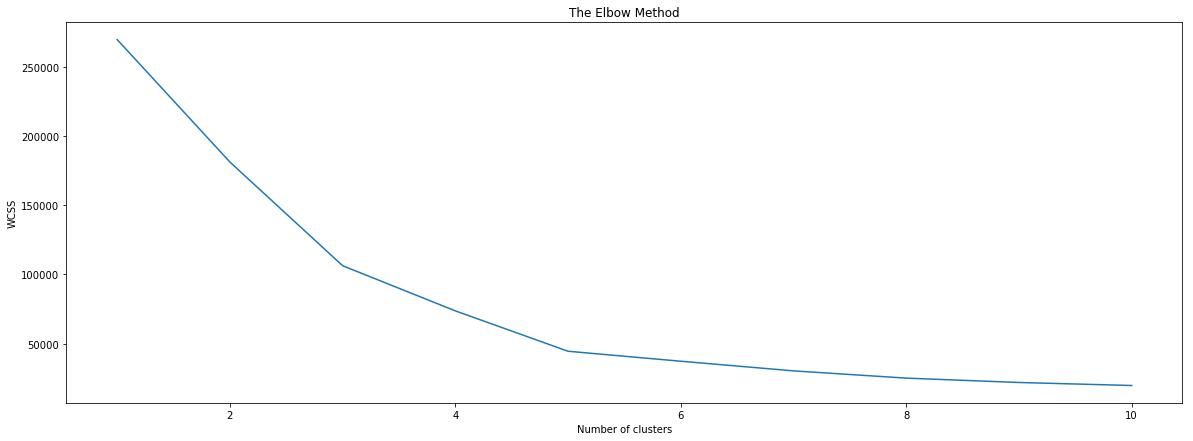

In [34]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

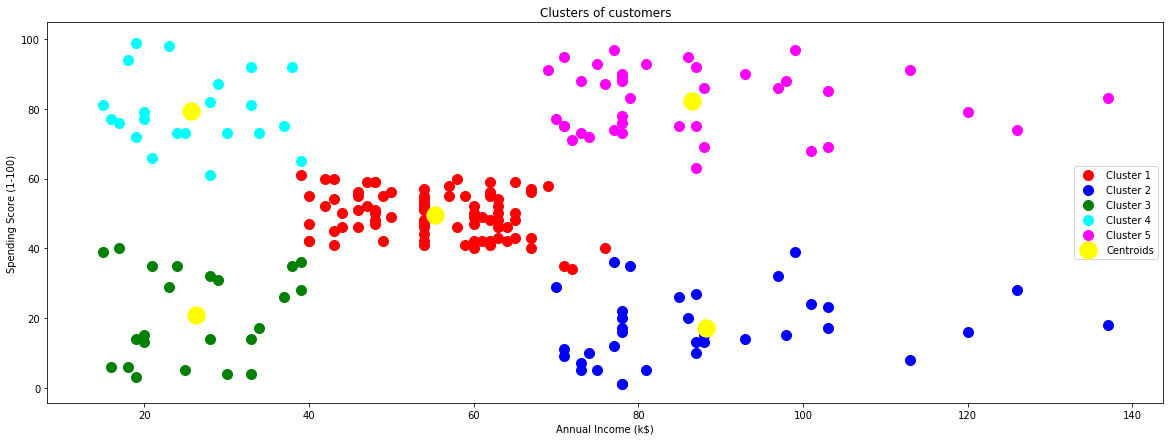

In [36]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()